# Example: Linear regression using sklearn.

In this example we are going to create a linear regression model for maximum and minimum July tempertures in London.

We are going to use this CSV data, [London weather by Alan Jones](https://raw.githubusercontent.com/alanjones2/dataviz/master/londonweather.csv).

## Dependencies

The model for linear regression comes from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

The other libraries used are:

In [31]:
import matplotlib.pyplot as plt     # visualization
import numpy as np                  # manipulate data frames
import pandas as pd                 # load csv data
from sklearn.linear_model import LinearRegression

## Prepare Data Frame

* load data from CSV
* prepare arrays

In [32]:
data = pd.read_csv('https://raw.githubusercontent.com/alanjones2/dataviz/master/londonweather.csv')
data

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...
743,2018,12,10.7,5.2,60.6,40.3
744,2019,1,7.6,2.0,33.2,56.4
745,2019,2,12.4,3.3,34.2,120.2
746,2019,3,13.1,5.8,49.6,119.0


## Maximum Temperatures

For this analysis use maximum temperatures for July (this is typically the hottest month in London with an average temperature around 19°C).

In [33]:
# subselect year and maximum & minimum temperatures for July only
july = data.query('Month == 7').loc[:,['Year', 'Tmax', 'Tmin']]   
july

,Year,Tmax,Tmin
6,1957,22.5,13.8
18,1958,21.7,12.9
30,1959,24.7,13.3
42,1960,20.1,12.4
54,1961,22.1,12.1
...,...,...,...
690,2014,25.8,15.0
702,2015,23.7,13.8
714,2016,24.0,14.5
726,2017,23.8,14.9


Use the year (`Year`) as the predictor (this will be the `X`-axis), and the maximum temperature (`Tmax`) as the predicted value.

In [34]:
# predict for maximum temperatures
X = july.iloc[:, 0].values.reshape(-1, 1)   # (years) convert into a numpy array
Y = july.iloc[:, 1].values.reshape(-1, 1)   # (max temp) -1 means that calculate the dimension of rows, but have 1 column
model_max = LinearRegression()              # create instance of class
model_max.fit(X, Y)                         # perform linear regression
Y_pred = model_max.predict(X)               # make predictions given on temperatures given years

In [35]:
type(X)

numpy.ndarray

Regression coefficients for maximum temperature predictions:

In [36]:
model_max.intercept_, model_max.coef_

(array([-72.49635114]), array([[0.04808743]]))

Use regression to show a line plot with predicted maximum temperatures:

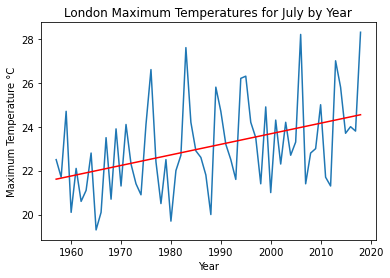

In [37]:
plt.plot(X, Y)                              # line scatter ploy
plt.plot(X, Y_pred, color='red')            # draw regression line
plt.title('London Maximum Temperatures for July by Year')
plt.xlabel('Year')
plt.ylabel('Maximum Temperature °C')
plt.show()

### Temperatures beyond 2020?
What are the expected temperatures beyond 2020?

In [38]:
# extend years to 2040
XF = np.append(X, np.arange(2020, 2040)).reshape(-1, 1)


Fill the future years with None (NaN) so the temperature plot looks clean:

In [53]:
# extend temperatures to 2040

# fill with zeros
YF = np.append(Y, np.full(20, None)).reshape(-1, 1)

# or can fill with average temperature
# YF = np.append(Y, np.full(20, fill_value=Y.mean())).reshape(-1, 1)

Update temperature (`Y`) predictions:

In [51]:
Y_pred = model_max.predict(XF)

Plot predictions:

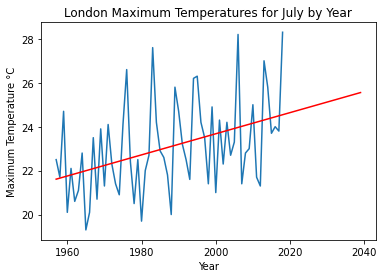

In [52]:
plt.plot(XF, YF)
plt.plot(XF, Y_pred, color='red')
plt.title('London Maximum Temperatures for July by Year')
plt.xlabel('Year')
plt.ylabel('Maximum Temperature °C')
plt.show()


## Minimum Temperatures

Use regression to show a line plot with predicted minimum temperatures:

Use the year (`Year`) as the predictor (this will be the `X`-axis), and the minimum temperature (`Tmin`) as the predicted value.

In [42]:
# predict for minimum temperatures
Z = july.iloc[:, 2].values.reshape(-1, 1)   # min temp
model_min = LinearRegression()              # create instance of class
model_min.fit(X, Z)                         # perform linear regression
Z_pred = model_min.predict(X)               # make predictions given on temperatures given years

Regression coefficients for maximum temperature predictions:

In [43]:
model_min.intercept_, model_min.coef_

(array([-52.81433104]), array([[0.03340384]]))

Use regression to show a line plot with predicted minimum temperatures:

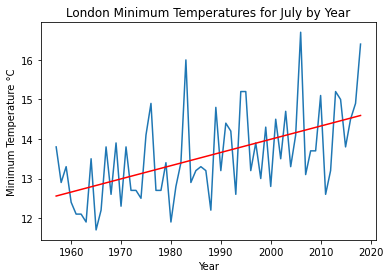

In [44]:
plt.plot(X, Z)                              # line scatter ploy
plt.plot(X, Z_pred, color='red')            # draw regression line
plt.title('London Minimum Temperatures for July by Year')
plt.xlabel('Year')
plt.ylabel('Minimum Temperature °C')
plt.show()